In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
# check numbers of samples and features
print("Size of train data before dropping Id feature: {}".format(train_df.shape))
print("Size of test data before dropping Id feature: {}".format(test_df.shape))

Size of train data before dropping Id feature: (1460, 81)
Size of test data before dropping Id feature: (1459, 80)


In [6]:
# saving the 'Id'column
train_id= train_df['Id']
test_id= test_df['Id']

#droping 'Id' column as it is unnecessary for the prediction
train_df.drop('Id', axis=1,inplace= True)
test_df.drop('Id', axis=1, inplace= True)

In [7]:
print('Size of train data after dropping Id feature: {}'.format(train_df.shape))
print('Size of test data after dropping Id feature: {}'.format(test_df.shape))

Size of train data after dropping Id feature: (1460, 80)
Size of test data after dropping Id feature: (1459, 79)


In [8]:
# selecting int data type columns
train_df = train_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

test_df=test_df[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [9]:
train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [11]:
test_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [12]:
# getting description
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Average house price is $180921

In [13]:
#most correlated features with the price
corrmat=train_df.corr()
c=10
sale_cols= corrmat.nlargest(c,'SalePrice')['SalePrice'].index
corr_feat= pd.DataFrame(sale_cols)
corr_feat.columns= ['Most Correlated Features']

corr_feat

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


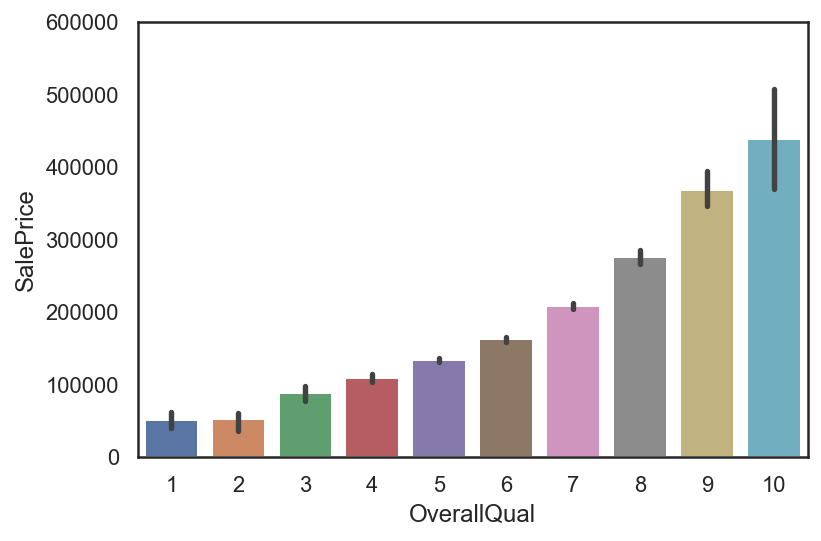

In [14]:
cor=sns.barplot(x=train_df['OverallQual'],y=train_df['SalePrice'])
cor.axis(ymin=0, ymax=600000);

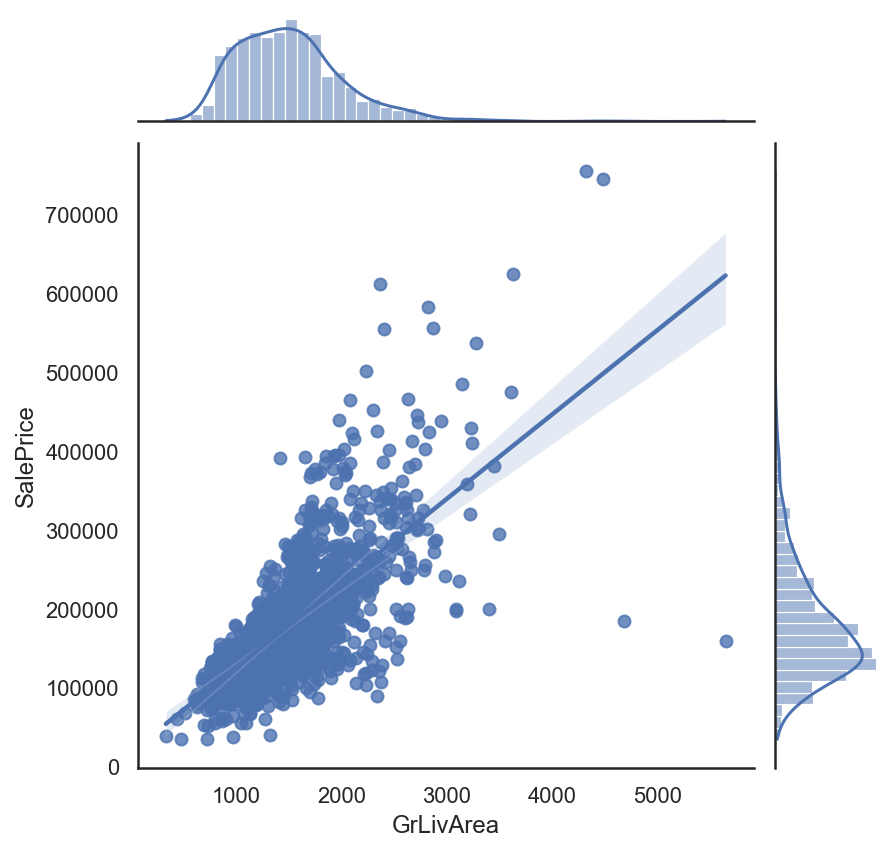

In [15]:
sns.jointplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],kind='reg')

In above correlation, there are two data points tells that people will pay less for large living area(area square feet). 

These are the outliers as it is not making sense so we will drop it.

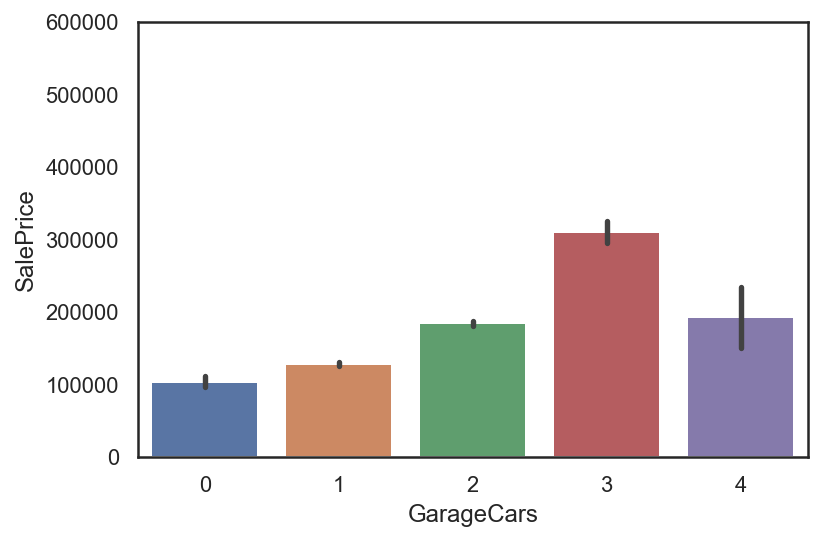

In [16]:
cor=sns.barplot(x=train_df['GarageCars'], y=train_df['SalePrice'])
cor.axis(ymin=0, ymax=600000);

In this correlation, Sale price with 4 garage cars is less than the sale price with three other garage cars. 

Therefore, it will be removed since it is an outlier as it is not making any sense to this correlation.

In [17]:
train_df1= train_df.drop(train_df[(train_df['GarageCars']>3)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

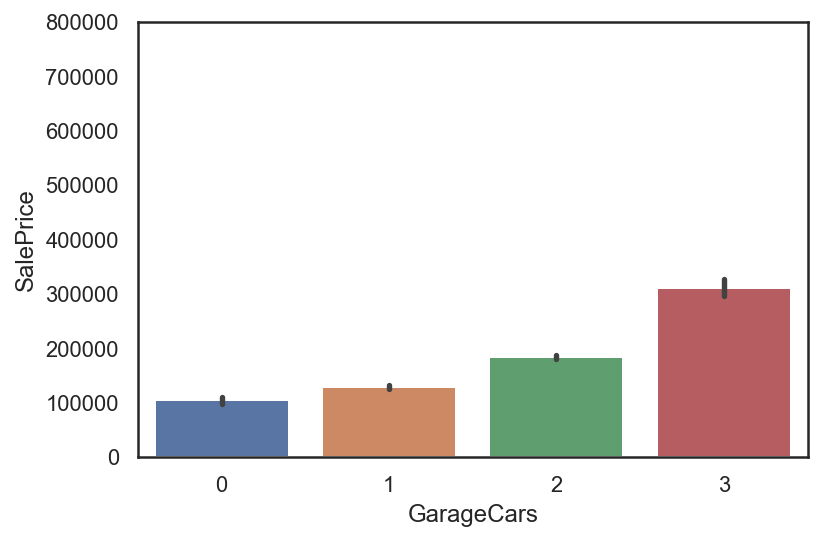

In [18]:
cor=sns.barplot(x=train_df1['GarageCars'], y=train_df1['SalePrice'])
cor.axis(ymin=0, ymax=800000);

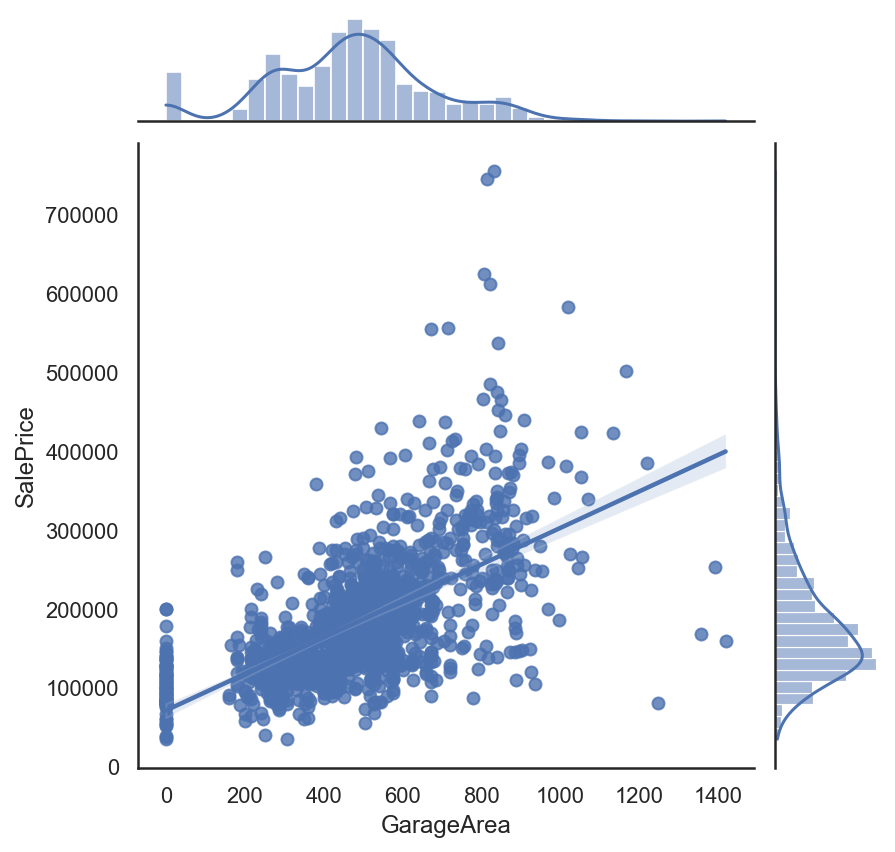

In [19]:
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')

The correlation seems perfect

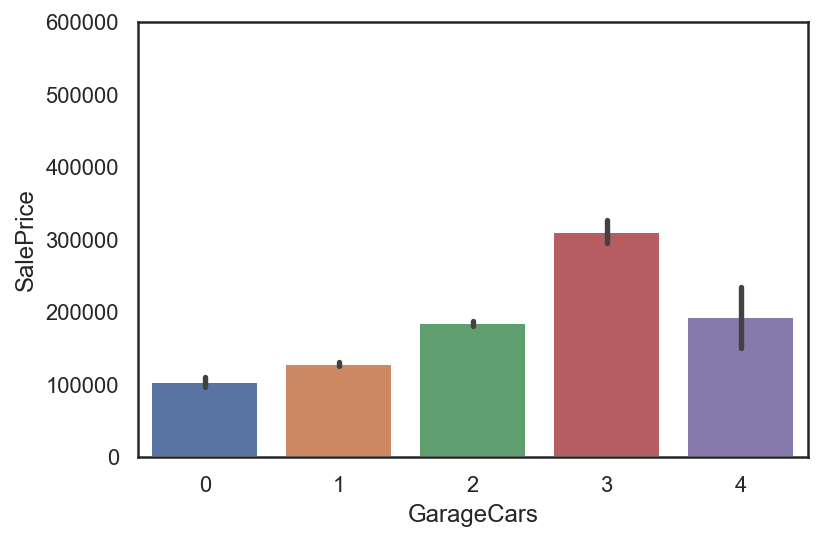

In [20]:
#checking for correlation between Sale Price and Garage Cars
corr=sns.barplot(x=train_df['GarageCars'], y=train_df['SalePrice'])
corr.axis(ymin=0, ymax=600000);


In this correlation, Sale price with 4 garage cars is less than the sale price with three other garage cars. Therefore, since it is not making any sense to this correlation we have to remove it. It is an outlier 

In [21]:
#Removing the outliers
train_df1= train_df.drop(train_df[(train_df['GarageCars']>3)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

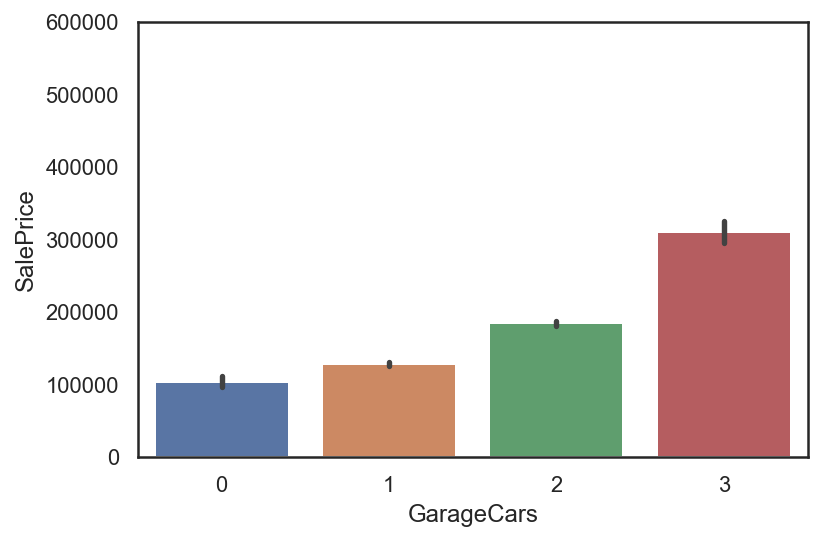

In [22]:
cor=sns.barplot(x=train_df1['GarageCars'], y=train_df1['SalePrice'])
cor.axis(ymin=0, ymax=600000);

Now, this correlation seems perfect.

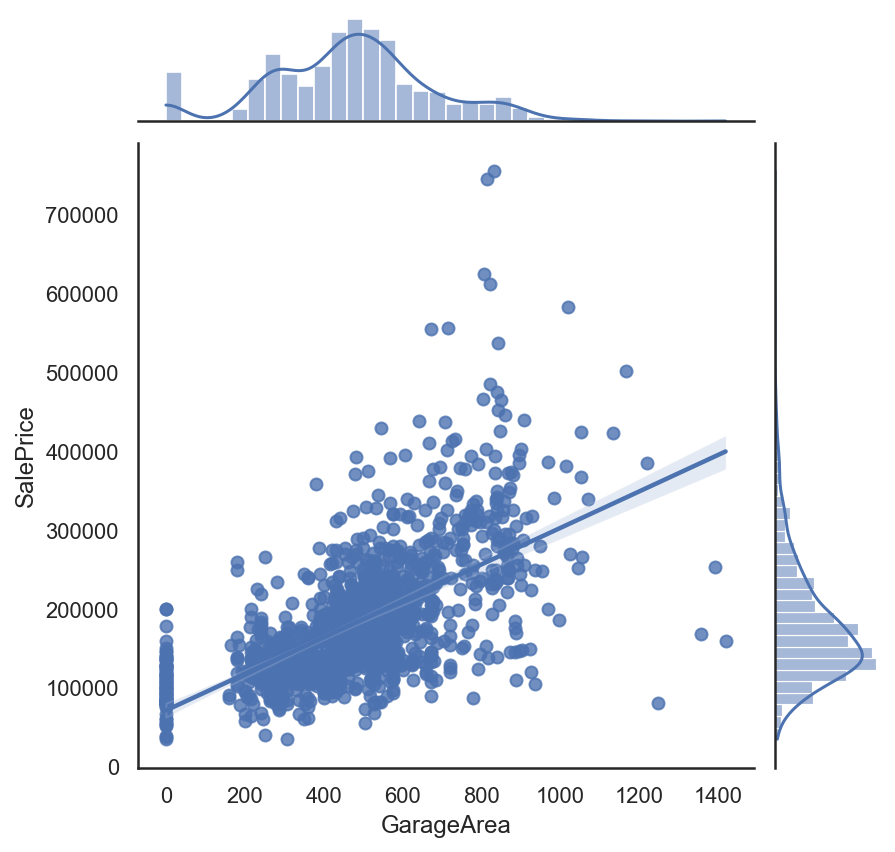

In [23]:
#Correlation between GarageArea & Sale Price
sns.jointplot(x=train_df['GarageArea'],y=train_df['SalePrice'],kind='reg')

In this correlation, Large garage area is available at low sale price which is not making any sense. It can be concluded as outliers, so we have to remove it.


In [24]:
#Removing the outliers
train_df2= train_df.drop(train_df[(train_df['GarageArea']>1000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

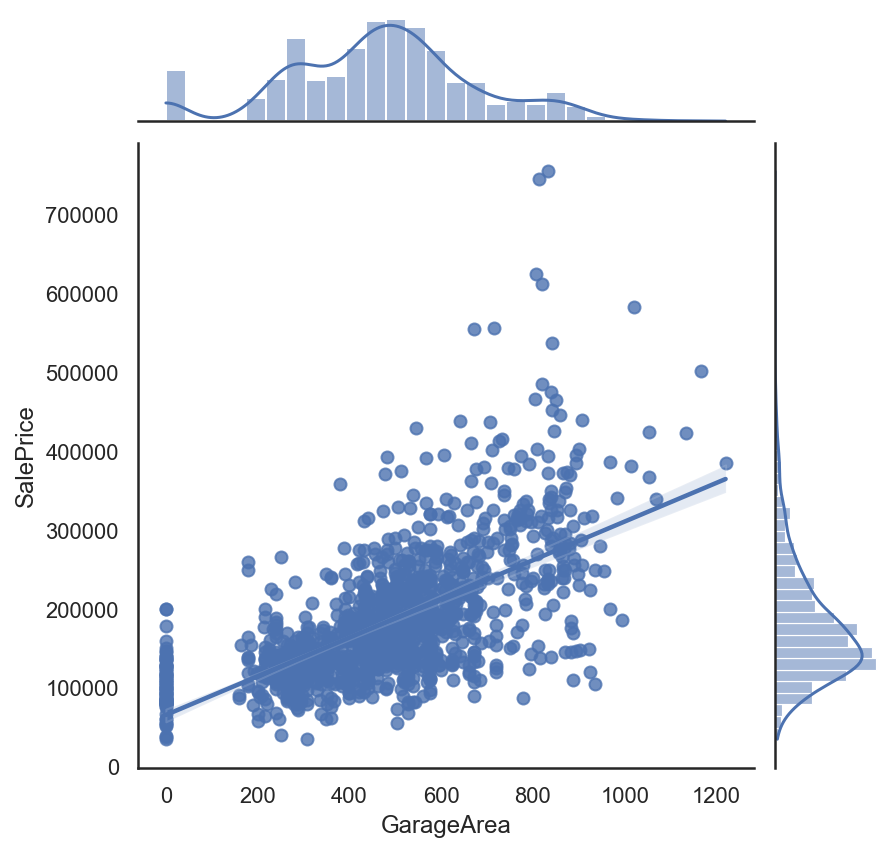

In [25]:
sns.jointplot(x=train_df2['GarageArea'],y=train_df2['SalePrice'],kind='reg')
#perfect correlation

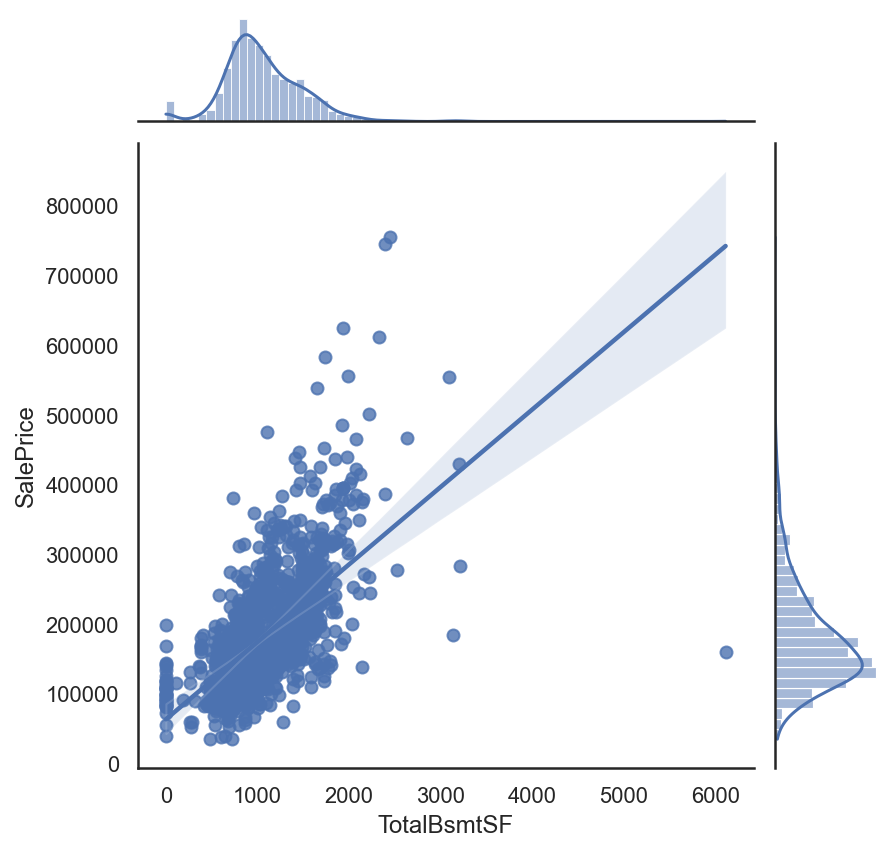

In [26]:
#Correlation between TotalBsmtSF & Sale price
sns.jointplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'],kind='reg')


In [27]:
#Total basement area is more when sale price is low, so it is an outlier and it has to be removed

In [28]:
#Removing the outlier
train_df3= train_df.drop(train_df[(train_df['TotalBsmtSF']>5000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

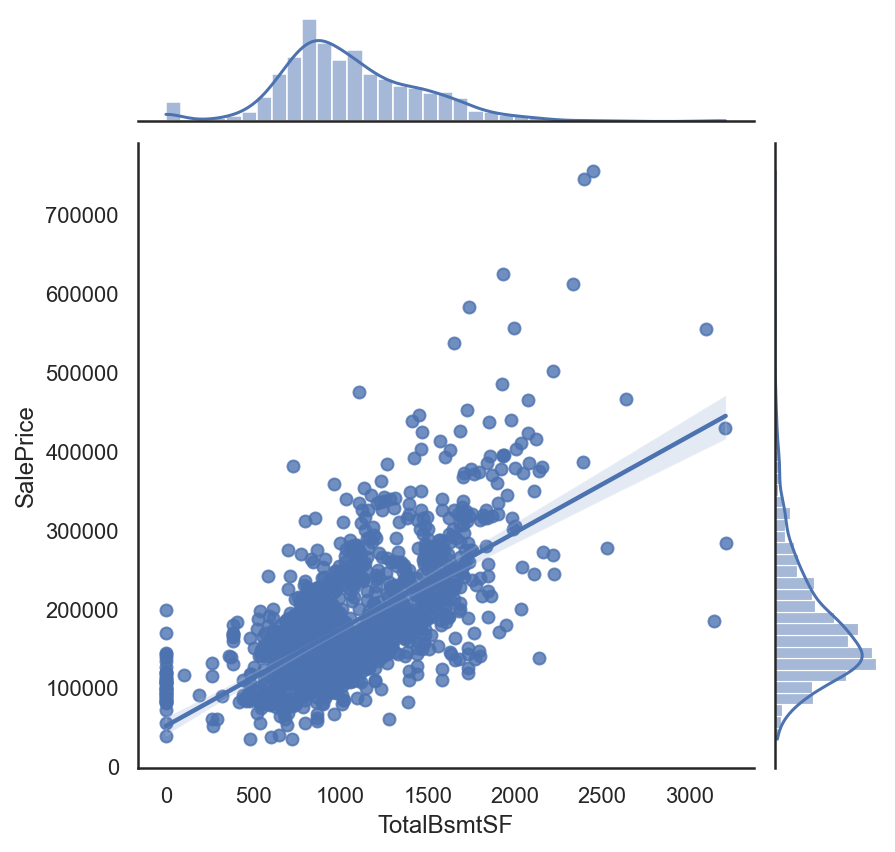

In [29]:
sns.jointplot(x=train_df3['TotalBsmtSF'],y=train_df3['SalePrice'],kind='reg')

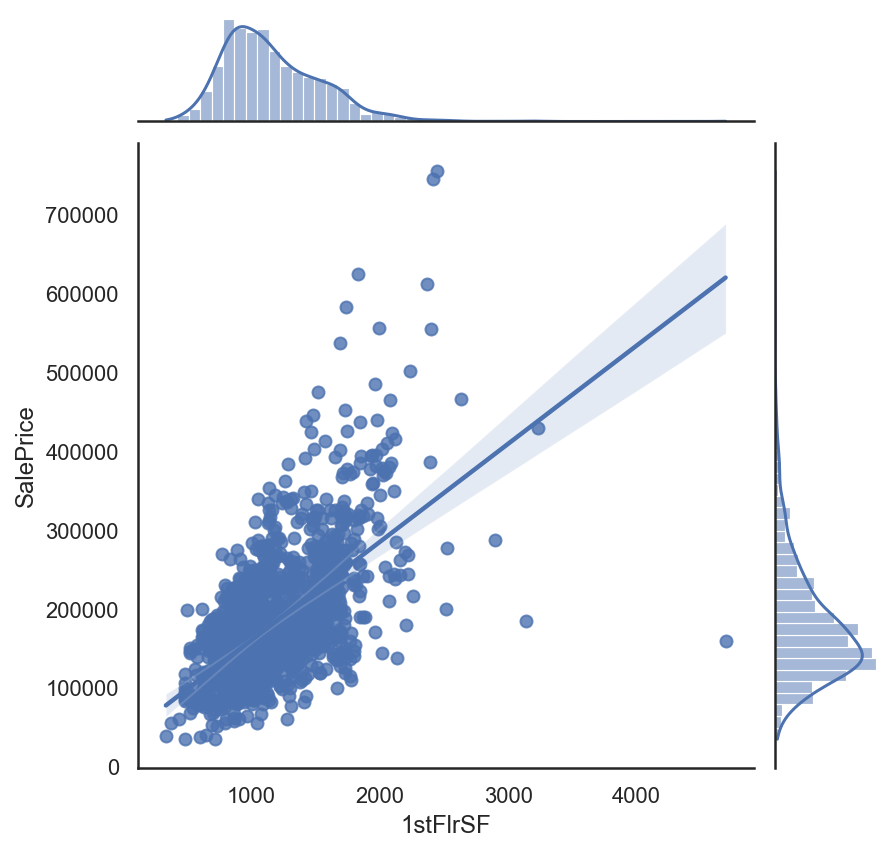

In [30]:
#Correlation between 1st floor square feet & sale price
sns.jointplot(x=train_df['1stFlrSF'],y=train_df['SalePrice'],kind='reg')

In [31]:
#Removing the outliers
train_df3= train_df.drop(train_df[(train_df['1stFlrSF']>3000)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)

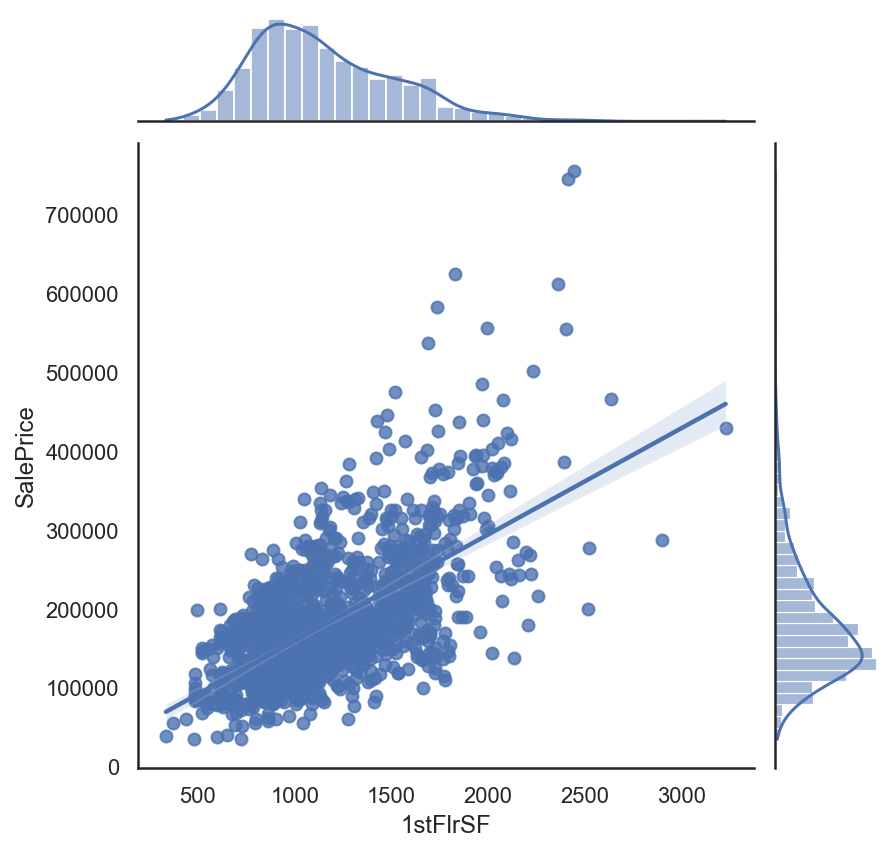

In [32]:
sns.jointplot(x=train_df3['1stFlrSF'],y=train_df3['SalePrice'],kind='reg')

In [33]:
#perfect correlation here

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

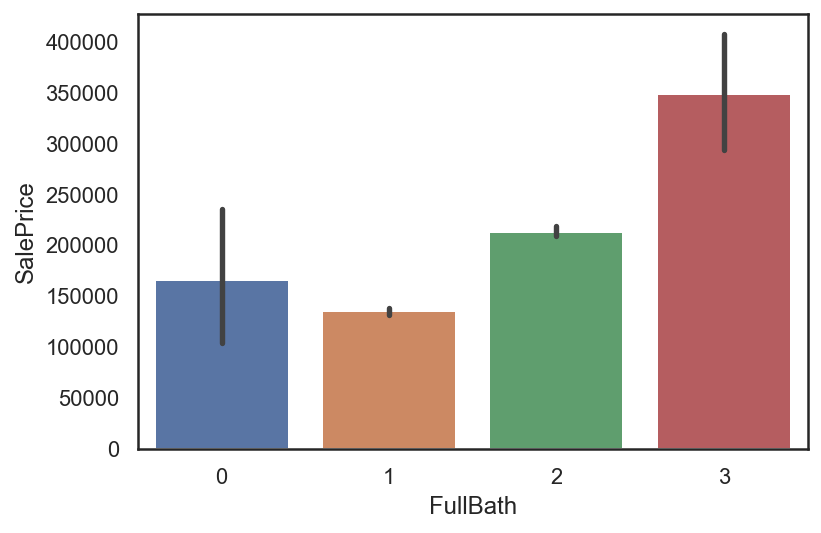

In [34]:
#Correlation between Fullbath & sale price
sns.barplot(x=train_df['FullBath'],y=train_df['SalePrice'])

In [35]:
#perfect correlation here

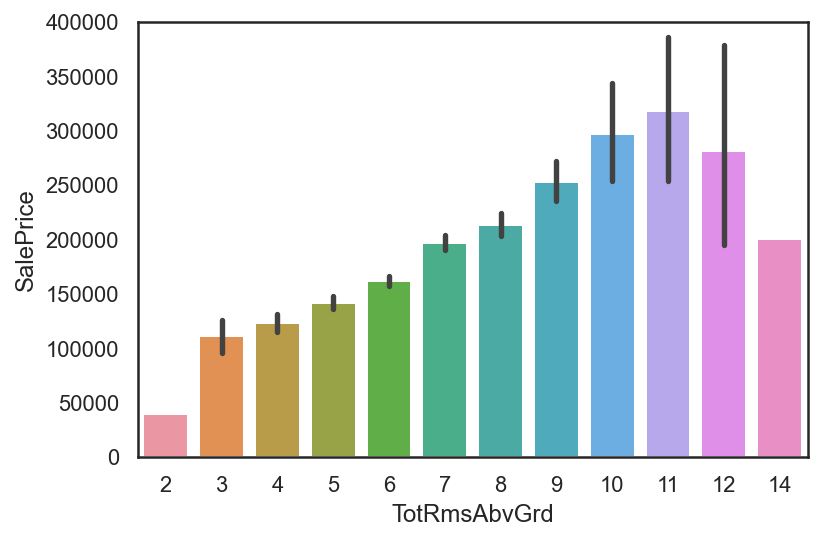

In [36]:
#Correlation between Total rooms & sales price
cor=sns.barplot(x=train_df['TotRmsAbvGrd'],y=train_df['SalePrice'])
cor.axis(ymin=0, ymax=400000);

##### we've got outliers in this correlation. 
##### The last bin shows a 14 room at a low price, that is obviously not possible

In [37]:
#Removing the outliers
train_df4= train_df.drop(train_df[(train_df['TotRmsAbvGrd']>12)&(train_df['SalePrice']<300000)].index).reset_index(drop=True)


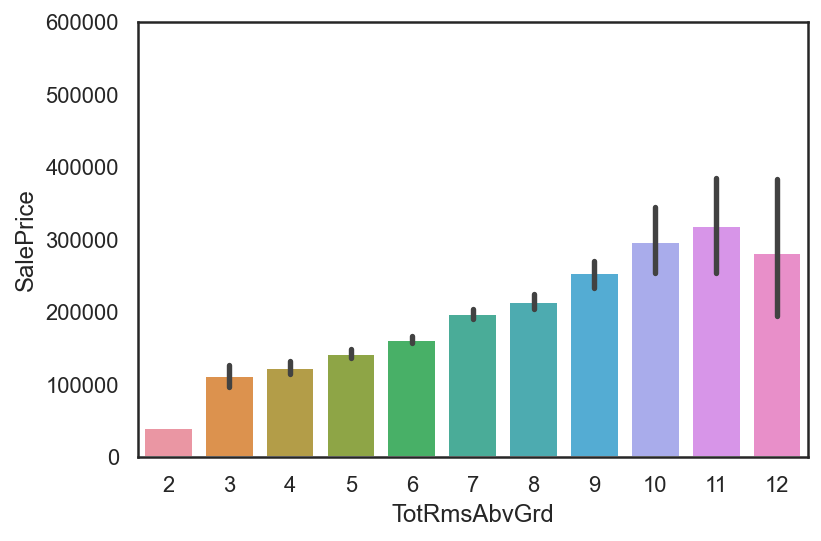

In [38]:
cor=sns.barplot(x=train_df4['TotRmsAbvGrd'],y=train_df4['SalePrice'])
cor.axis(ymin=0, ymax=600000);

##### perfect correlation above

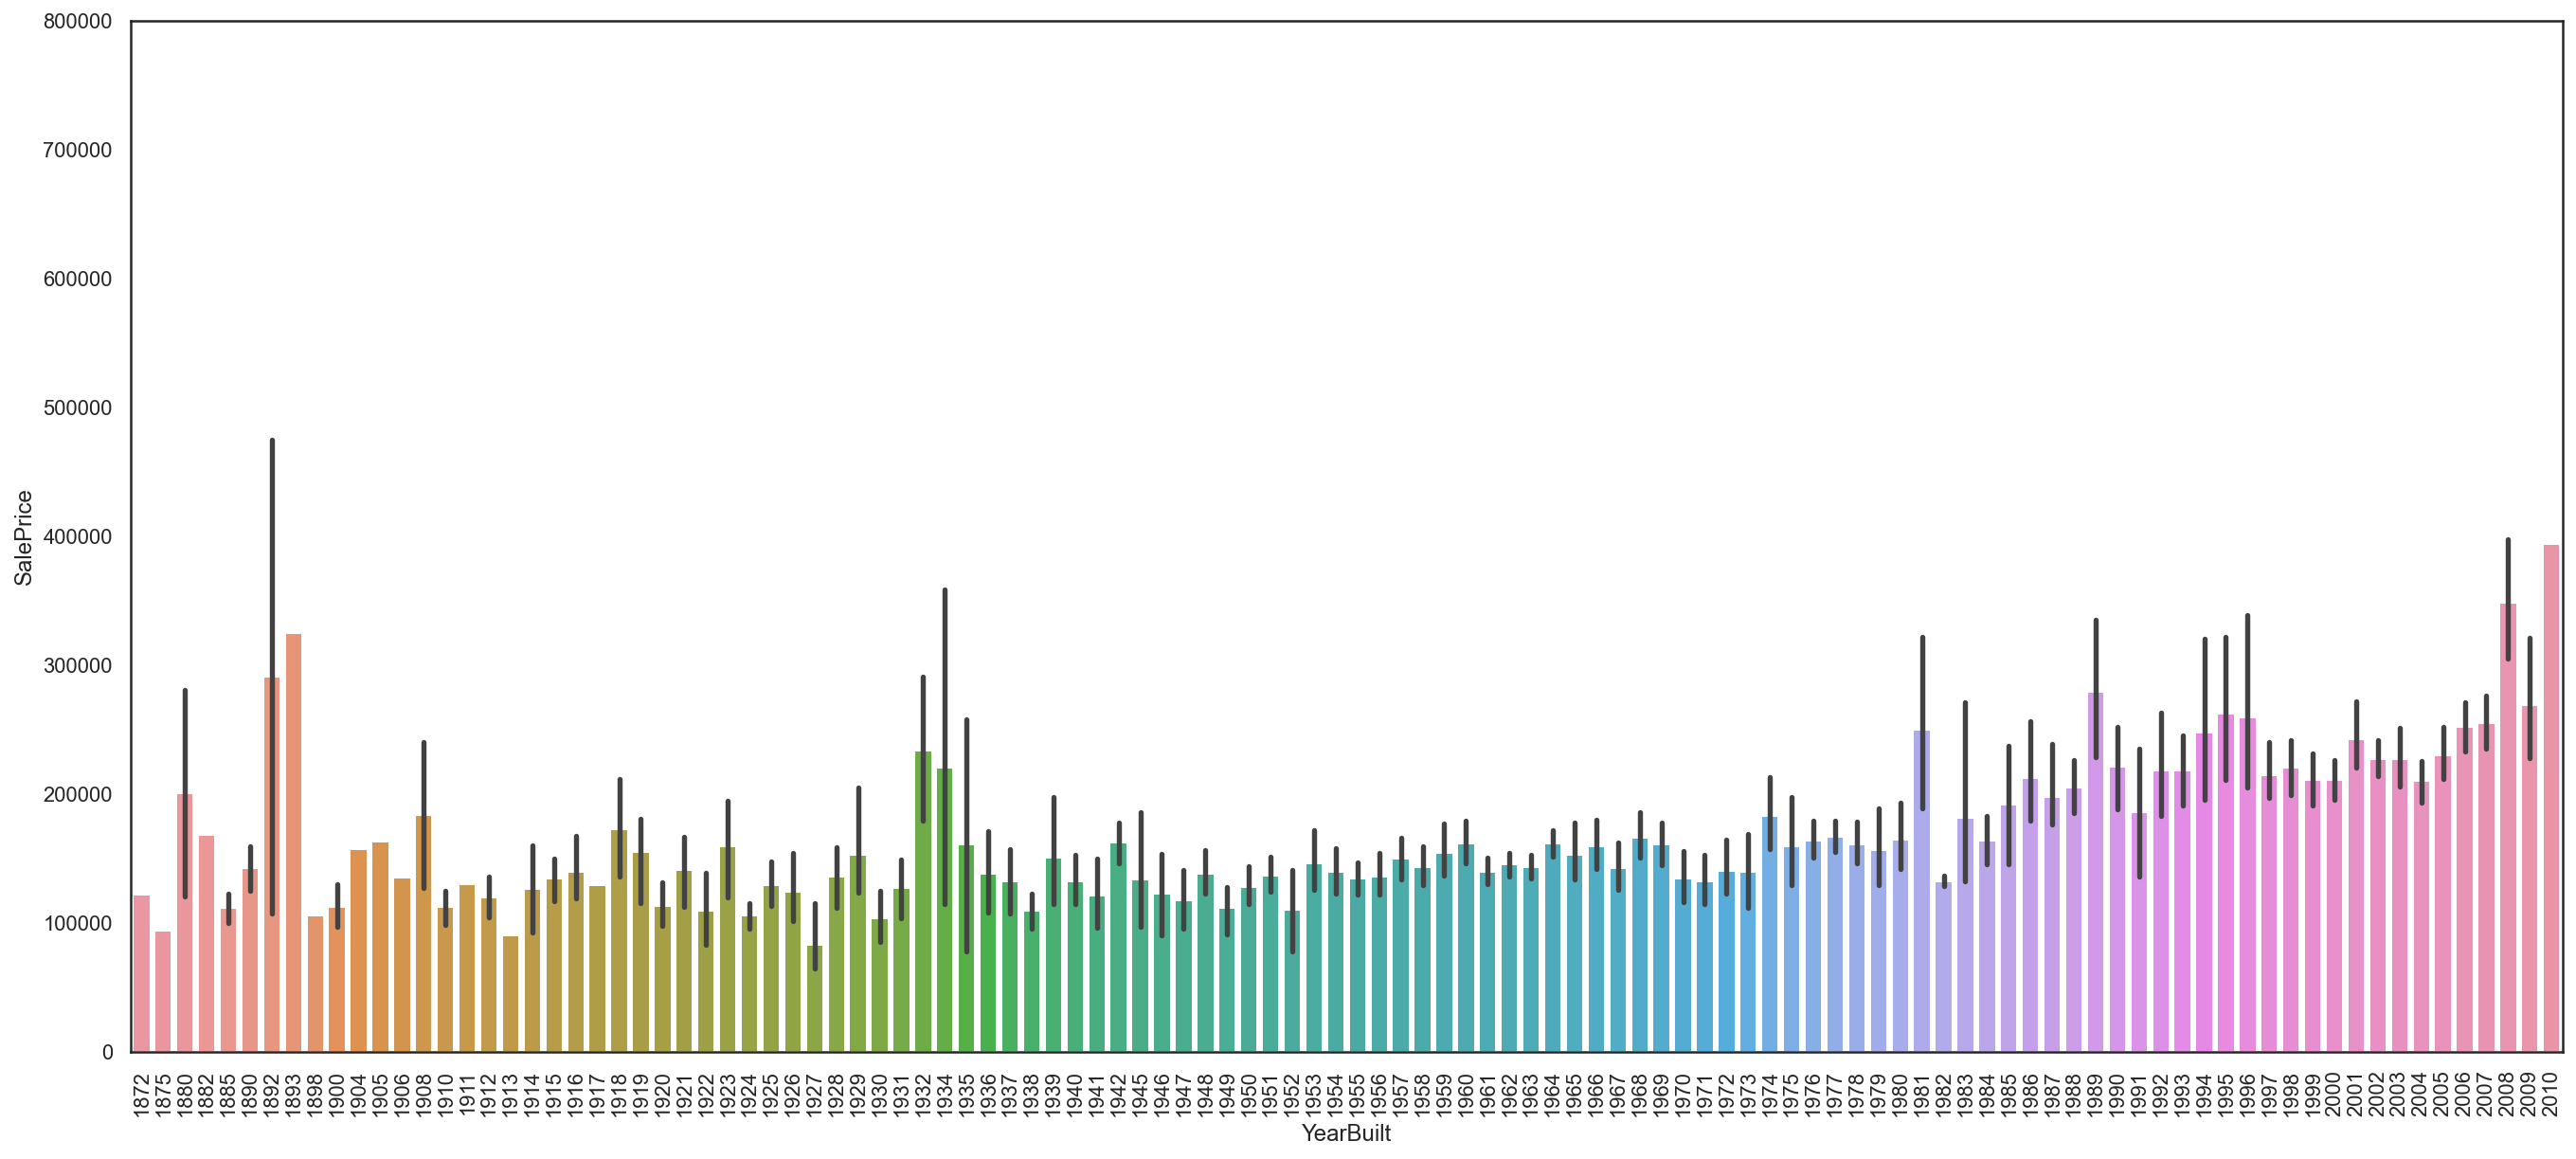

In [39]:
#Correlation between Original construction date & sales price
corr_cd_sp= pd.concat([train_df['SalePrice'],train_df['YearBuilt']],axis=1)

f,ax=plt.subplots(figsize=(23,10))

cor=sns.barplot(x=train_df['YearBuilt'],y=train_df['SalePrice'],data=corr_cd_sp)
cor.axis(ymin=0,ymax=800000)

plt.xticks(rotation=90);

##### correlation seems perfect, no outlier although there is a rise and fall of sales price over time
##### but this can be caused by inflation or economic crisis.

In [40]:
#data wrangling
#missing data in train dataset
tot_train= train_df.isnull().sum().sort_values(ascending= False)
percent= (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([total_train, percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [42]:
train_df = train_df.drop((missing_data[missing_data['Total'] > 81]).index,1)


In [43]:
train_df.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
dtype: int64

In [45]:
tot_test=test_df.isnull().sum().sort_values(ascending= False)

percent= (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)

missing_data= pd.concat([tot_test, percent],axis=1,keys=['Total','Percent'])

missing_data.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [46]:
test_df = test_df.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [47]:
test_df.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
dtype: int64